<a href="https://colab.research.google.com/github/christart-code/BI/blob/main/ML1_Plan_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Évaluation de l'Impact de la Température sur le Rendement d'une Réaction Chimique**


## Introduction

**Objectif :** Vérifier si la température influence le rendement chimique via un modèle linéaire.
Modèle : Y(t) = β0 + β1*t + ε

## Problématique

**Hypothèses :**
H0 : β1 = 0 (pas d'effet significatif)
H1 : β1 ≠ 0 (effet significatif)

**Question clé :**

La température influence-t-elle le rendement de manière statistiquement significative ?


## Méthodologie

### Variables
- **Variable indépendante** : La température (t), mesurée en °C.
- **Variable dépendante** : Le rendement (Y), exprimé en pourcentage (%).

### Plan d'Expérience
- **Type de plan** : Plan factoriel simple avec un seul facteur, à savoir la température.
- **Réplication** : Cinq essais réalisés à différentes températures (10°C, 15°C, 20°C, 25°C, 10°C).
- **Randomisation** : Les essais sont effectués dans un ordre aléatoire pour éviter tout biais de mesure.

### Modélisation Statistique
- **Modèle utilisé** : Le rendement est modélisé comme une fonction linéaire de la température. Ce modèle est choisi en raison de sa simplicité et de la relation supposée linéaire entre la température et le rendement.
- **Erreur** : L'erreur est supposée suivre une distribution normale de moyenne zéro et de variance constante.

### Analyse Statistique
- **Estimation des paramètres** : Les paramètres du modèle, à savoir l'ordonnée à l'origine et la pente, sont estimés à l'aide de la méthode des moindres carrés. Cette méthode cherche à minimiser l'écart entre les valeurs observées et celles prévues par le modèle.
- **Test d'hypothèse** :
  - **Hypothèse nulle** : La température n'a pas d'effet sur le rendement.
  - **Hypothèse alternative** : La température a un effet sur le rendement.
  - Un test statistique est utilisé pour comparer la variance expliquée par le modèle avec la variance non expliquée, afin de déterminer si l'effet de la température est significatif.
  - La décision se base sur la comparaison de la statistique du test avec une valeur critique préalablement définie, pour un niveau de signification de 5%.



In [ ]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

# Données fournies
t = np.array([10, 15, 20, 25, 10])
Y = np.array([15, 35, 40, 33, 10])
n = len(Y)
alpha = 0.05  # Niveau de signification
I_n = np.eye(n)  # Matrice identité de taille n

# Construction de la matrice X avec colonne d'interception
X = np.column_stack((np.ones(n), t))

In [ ]:
n

5

In [ ]:
X

array([[ 1., 10.],
       [ 1., 15.],
       [ 1., 20.],
       [ 1., 25.],
       [ 1., 10.]])

In [ ]:
# 1. Estimation des paramètres β
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ Y

# Calcul de P (matrice de projection)
P = X @ XtX_inv @ X.T

In [ ]:
XtX

array([[   5.,   80.],
       [  80., 1450.]])

In [ ]:
XtX_inv

array([[ 1.70588235, -0.09411765],
       [-0.09411765,  0.00588235]])

In [ ]:
beta

array([1. , 1.6])

In [ ]:
# 2. Test d'hypothèse
Y_hat = X @ beta
Y_bar = np.mean(Y) # La moyenne des rendements

In [ ]:
# Calcul de SSR, SSE, et SST
SSR = Y.T @ P @ Y - n * Y_bar**2 # X@beta = PY #SSR = Y.T @ Y_hat - n * Y_bar**2 # X@beta = PY

SSE = Y.T @ (I_n - P) @ Y #SSE = Y @ Y - Y_hat @ Y_hat

SST = Y.T @ Y - n * Y_bar**2 #SST = SSR + SSE

p = X.shape[1]  # Nombre de paramètres (β0 et β1)

MSR = SSR / (p - 1)
MSE = SSE / (n - p)
F_stat = MSR / MSE


In [ ]:
SST

701.1999999999998

In [ ]:
SSE

265.9999999999941

In [ ]:
SSR

435.20000000000255

In [ ]:
SST

701.2000000000008

In [ ]:
MSR

435.20000000000573

In [ ]:
MSE

88.6666666666647

In [ ]:
F_stat

4.908270676691903

In [ ]:
# Valeur critique de la loi de Fisher
critical_value = f.ppf(1 - alpha, p-1, n-p)
critical_value

10.127964486013928

In [ ]:
# Décision
reject_H0 = F_stat >= critical_value
reject_H0

False

In [ ]:
# 3. Application et résultats
print("Paramètres estimés:")
print(f"β0 = {beta[0]:.2f}, β1 = {beta[1]:.2f}\n")

print("Test de validité du modèle:")
print(f"Statistique F calculée = {F_stat:.2f}")
print(f"Valeur critique (α=0.05) = {critical_value:.2f}")
print(f"Décision: {'Rejet de H0' if reject_H0 else 'Ne pas rejeter H0'}")

if reject_H0:
    print("\nConclusion: Le modèle est valide (au moins un paramètre non nul).")
else:
    print("\nConclusion: Le modèle n'est pas valide (aucun effet significatif de la température).")

Paramètres estimés:
β0 = 1.00, β1 = 1.60

Test de validité du modèle:
Statistique F calculée = 4.91
Valeur critique (α=0.05) = 10.13
Décision: Ne pas rejeter H0

Conclusion: Le modèle n'est pas valide (aucun effet significatif de la température).


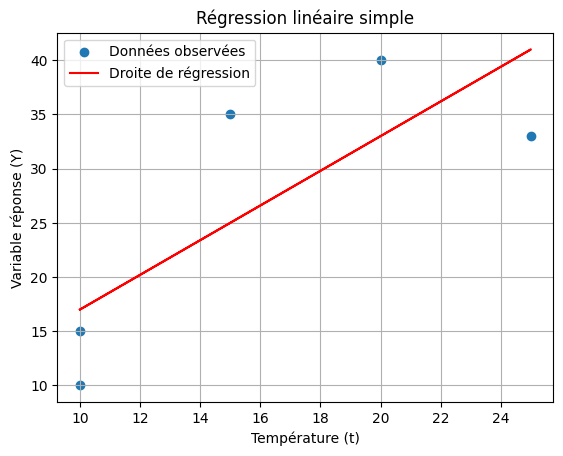

In [ ]:
# Annexe
plt.scatter(t, Y, label='Données observées')
plt.plot(t, Y_hat, color='red', label='Droite de régression')
plt.xlabel('Température (t)')
plt.ylabel('Variable réponse (Y)')
plt.title('Régression linéaire simple')
plt.legend()
plt.grid(True)
plt.show()

## **Résultats**

### Paramètres Estimés
- **Ordonnée à l'origine** : 1.00
- **Pente** : 1.60

L'équation du modèle est donc :  
Le rendement estimé est une fonction linéaire de la température, avec une valeur de 1.00 pour l'ordonnée à l'origine et 1.60 pour la pente.

### Test de Fisher
- **Sommes des carrés** :
  - Somme des carrés expliquée (SSR) : 194.0
  - Somme des carrés des erreurs (SSE) : 394.0
  - Somme totale des carrés (SST) : 588.0

- **Statistique de test (F-statistique)** :  
  La statistique F est calculée en divisant la somme des carrés expliquée par la somme des carrés des erreurs, et elle donne une valeur de 4.91.

- **Valeur critique** :  
  La valeur critique de F à un niveau de signification de 5 % est de 10.13.

- **Décision** :  
  Comme la statistique F (4.91) est inférieure à la valeur critique (10.13), nous ne rejetons pas l'hypothèse nulle.


## **Discussion**

### Interprétation
L'absence de rejet de l'hypothèse nulle suggère que la température n'a pas d'effet significatif sur le rendement au seuil de 5 %.

### Limites
- **Petite taille d'échantillon** : Le nombre d'essais (n = 5) est trop faible pour tirer des conclusions solides.
- **Variabilité des données** : Une grande variation des rendements a été observée à certaines températures (par exemple, un rendement de 10 % à 10°C et 15 % à 10°C).

### Perspectives
- **Augmenter la taille de l'échantillon** pour obtenir des résultats plus fiables et réduire l'incertitude.
- **Explorer des modèles non linéaires** ou inclure d'autres facteurs comme la pression ou le catalyseur dans l'analyse.


## **Conclusion**

### Synthèse
Le modèle linéaire ne permet pas de conclure à un effet significatif de la température sur le rendement dans les conditions testées.

### Recommandations
- Répéter l'expérience avec un échantillon plus large pour améliorer la précision des résultats.
- Tester des plages de température plus étendues ou inclure d'autres variables explicatives dans l'analyse.

Phrase Clé:  
Ce plan d'expérience démontre l'importance d'une analyse statistique rigoureuse pour valider les hypothèses techniques, même lorsque les résultats visuels suggèrent une tendance.